In [28]:
import pandas as pd

full_dataset_confounders_2014 = pd.read_csv('processed_data/full_dataset_confounders_2014.csv')
full_dataset_confounders_2015 = pd.read_csv('processed_data/full_dataset_confounders_2015.csv')
full_dataset_confounders_2016 = pd.read_csv('processed_data/full_dataset_confounders_2016.csv')


In [29]:
full_dataset_confounders_2014.set_index('osward', inplace=True)
full_dataset_confounders_2015.set_index('osward', inplace=True)
full_dataset_confounders_2016.set_index('osward', inplace=True)

In [36]:
full_dataset_confounders_2014_subset.total_count = full_dataset_confounders_2014_subset.total_count.astype('int')

In [33]:
full_dataset_confounders_2014_subset = full_dataset_confounders_2014.drop(['arts_count', 'cinema_count', 'gallery_count',
'comm_center_count', 'dance_count', 'lgbt_count', 'library_count', 'museum_count', 'music_count', 'outdoor_count',
'pub_count', 'skate_count', 'theatre_count', 'TOTAL_QUANTITY'], axis=1)

In [34]:
from sklearn.linear_model import LogisticRegression as lr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [4]:
import math
import numpy as np
import pandas as pd
# import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

In [38]:
T = full_dataset_confounders_2014_subset.total_count
X = full_dataset_confounders_2014_subset.loc[:,full_dataset_confounders_2014_subset.columns !='total_count']

In [46]:
y = full_dataset_confounders_2014[['TOTAL_QUANTITY']]

In [39]:
T

osward
E05000026    13
E05000027     1
E05000028     1
E05000029     7
E05000030     2
             ..
E05011485    11
E05011486     2
E05011487     4
E05011488     3
E05011489     4
Name: total_count, Length: 573, dtype: int32

In [40]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', lr())
])

pipe.fit(X, T)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression())])

In [41]:
predictions = pipe.predict_proba(X)
predictions_binary = pipe.predict(X)

In [42]:
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is:', metrics.f1_score(T, predictions_binary, average=None))

Accuracy: 0.1937

Confusion matrix:
[[ 0  1  5 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 [ 1  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]

F1 score is: [0.         0.         0.21940928 0.         0.26865672 0.30508475
 0.22641509 0.04444444 0.05882353 0.         0.08333333 0.15384615
 0.25       0.125      0.10810811 0.         0.         0.
 0.         0.         0.         0.         0.         0.4
 0.33333333 0.33333333 0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         0.         0.8        0.         0.         1.
 0.         0.         1.         0.66666667 1.         0.
 1.         1.         1.        ]


In [43]:
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value


In [44]:
predictions_logit = np.array([logit(xi) for xi in predictions[:,1]])


C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipykernel_8084\4112692049.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
C:\Users\muize\AppData\Local\Temp\ipyker

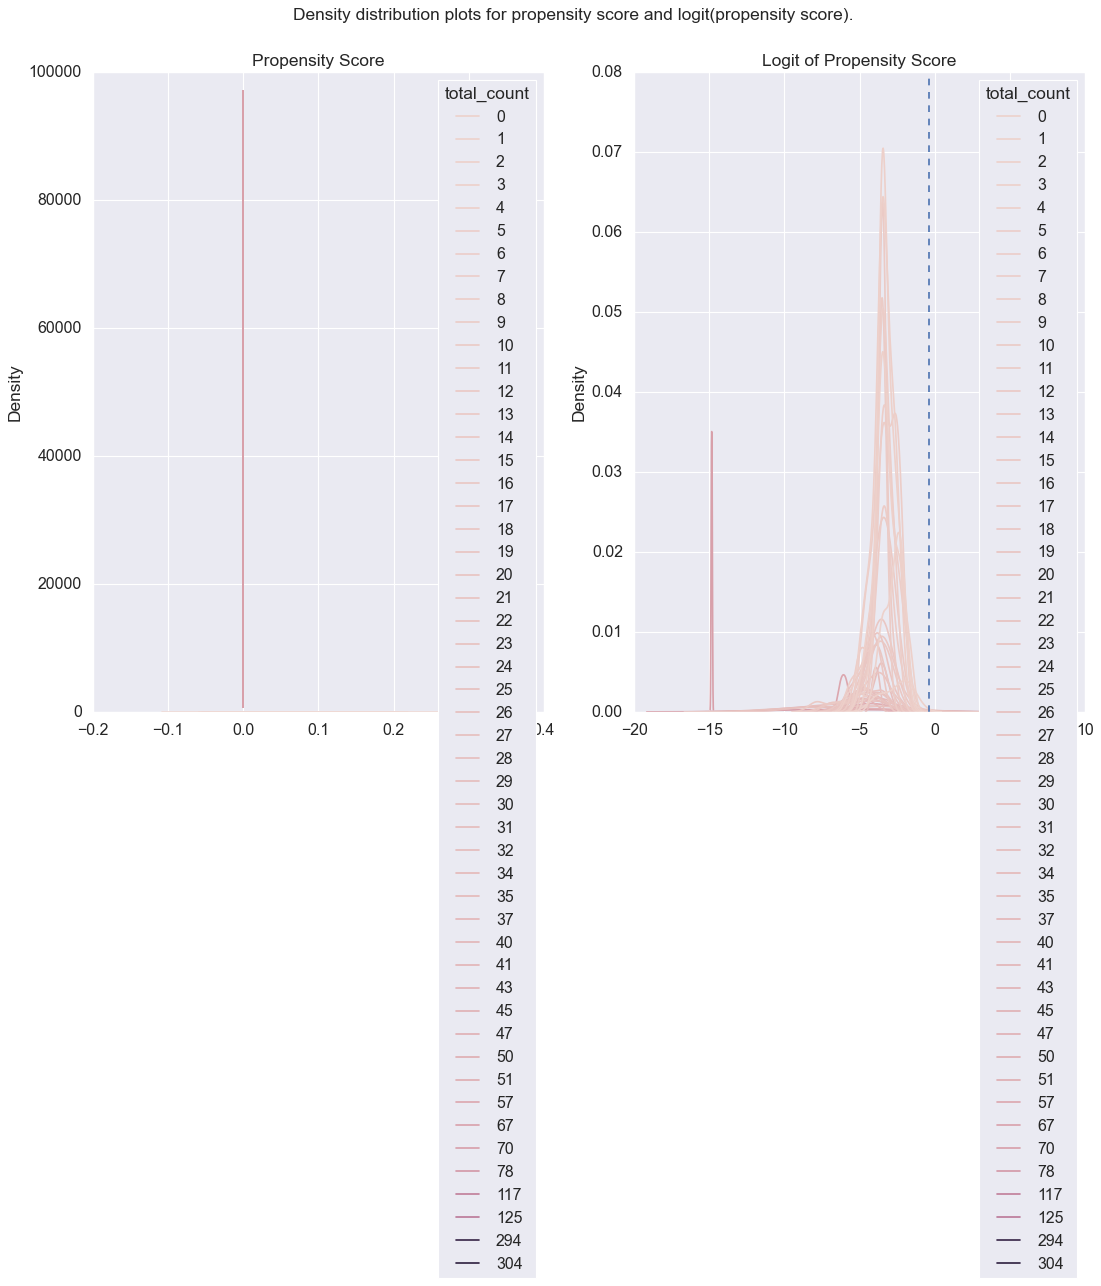

In [45]:
# Density distribution of propensity score (logic) broken down by treatment status
fig, ax = plt.subplots(1,2)
fig.suptitle('Density distribution plots for propensity score and logit(propensity score).')
sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
ax[0].set_title('Propensity Score')
sns.kdeplot(x = predictions_logit, hue = T , ax = ax[1])
ax[1].axvline(-0.4, ls='--')
ax[1].set_title('Logit of Propensity Score')
plt.show()

In [25]:
# Currently this does not affect the results as all observations fall within this range.
common_support = (predictions_logit > -10) & (predictions_logit < 10)

In [48]:
full_dataset_confounders_2014.loc[:,'propensity_score'] = predictions[:,1]
full_dataset_confounders_2014.loc[:,'propensity_score_logit'] = predictions_logit
full_dataset_confounders_2014.loc[:,'outcome'] = y.TOTAL_QUANTITY

X.loc[:,'propensity_score'] = predictions[:,1]
X.loc[:,'propensity_score_logit'] = predictions_logit
X.loc[:,'outcome'] = y.TOTAL_QUANTITY
X.loc[:,'treatment'] = full_dataset_confounders_2014.total_count

Matching implementation

In [49]:
caliper = np.std(full_dataset_confounders_2014.propensity_score) * 0.25

print('\nCaliper (radius) is: {:.4f}\n'.format(caliper))

df_data = X

knn = NearestNeighbors(n_neighbors=10 , p = 2, radius=caliper)
knn.fit(df_data[['propensity_score_logit']].to_numpy())


Caliper (radius) is: 0.0071



NearestNeighbors(n_neighbors=10, radius=0.007127404151311091)

In [50]:
# Common support distances and indexes
distances , indexes = knn.kneighbors(
    df_data[['propensity_score_logit']].to_numpy(), \
    n_neighbors=10)

In [51]:
print('For item 0, the 4 closest distances are (first item is self):')
for ds in distances[0,0:4]:
    print('Element distance: {:4f}'.format(ds))
print('...')

For item 0, the 4 closest distances are (first item is self):
Element distance: 0.000000
Element distance: 0.002804
Element distance: 0.002968
Element distance: 0.003808
...


In [52]:
print('For item 0, the 4 closest indexes are (first item is self):')
for idx in indexes[0,0:4]:
    print('Element index: {}'.format(idx))
print('...')

For item 0, the 4 closest indexes are (first item is self):
Element index: 0
Element index: 325
Element index: 162
Element index: 126
...


In [128]:
import networkx as nx

In [136]:
G = nx.Graph()

In [137]:
G.add_nodes_from(df_data.reset_index()['osward'].tolist())

In [132]:
G

In [138]:
df_data_no_index = df_data.reset_index()
epsilon = 0.0001
for index, row in df_data_no_index.iterrows():
    other_rows = df_data_no_index[df_data_no_index['treatment'] != row.treatment]
    for o_index, o_row in other_rows.reset_index().iterrows():
        modified_distance = (abs(row.propensity_score_logit - o_row.propensity_score_logit) + epsilon) / abs(row.treatment - o_row.treatment)
        if not G.has_edge(row.osward, o_row.osward):
            G.add_edge(row.osward, o_row.osward, weight=modified_distance)


In [143]:
from networkx.algorithms.tree.branchings import maximum_branching



In [145]:
edmonds_applied = maximum_branching(G)

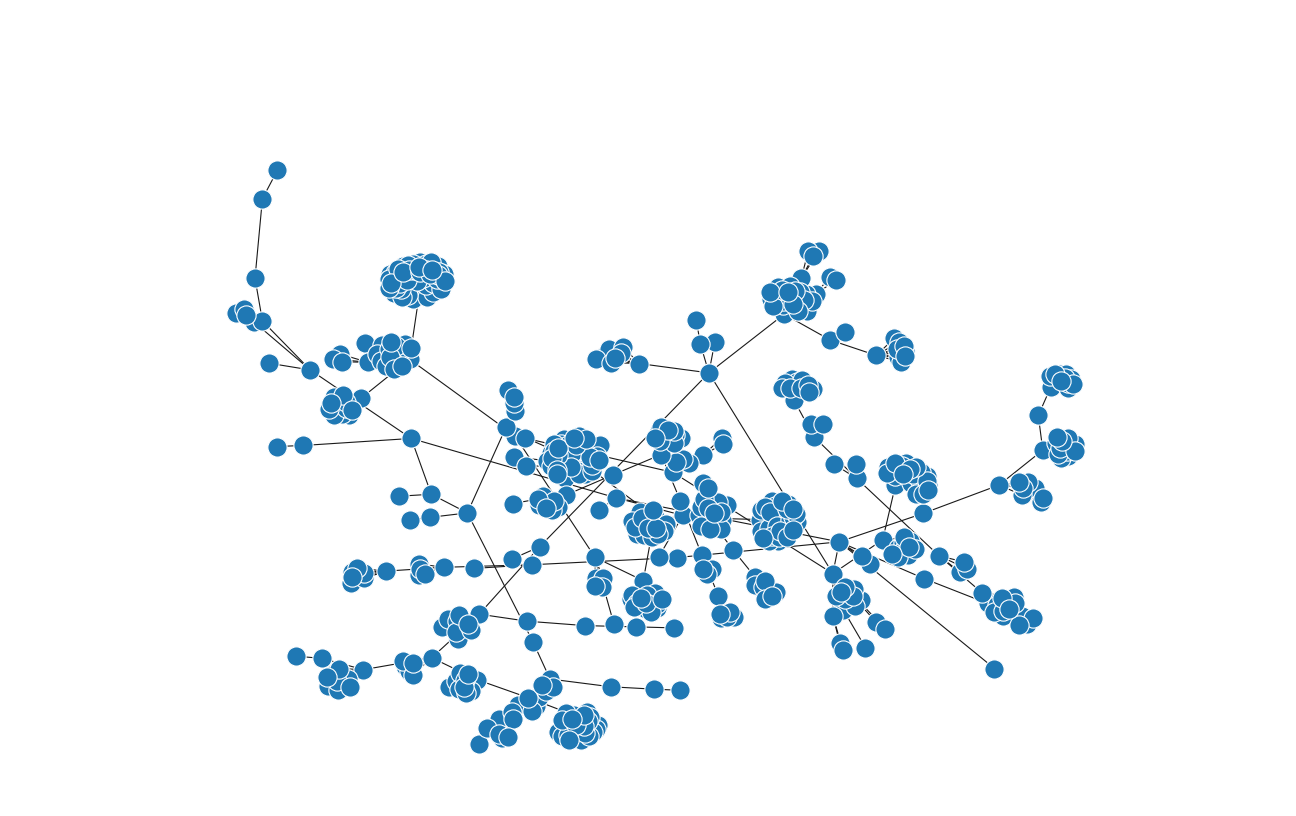

In [147]:
nx.draw(edmonds_applied)

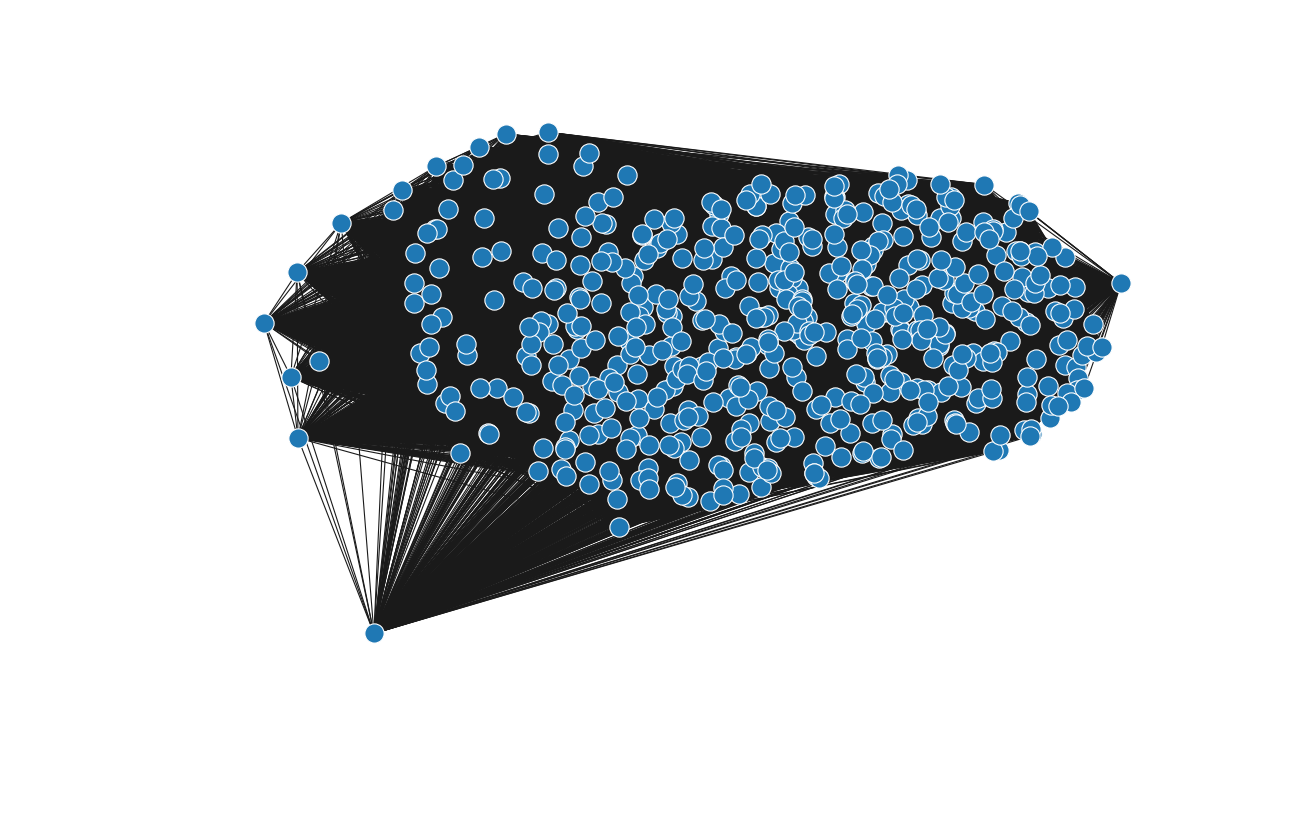

In [148]:
nx.draw(G)